# Predicting US Immigration Quota

## Current variables: US population, Global population, US GDP, Foreign Policy indicator.

## Will add: Global GDP, Immediate relatives of US citizens that become citizens (includes spouses, children, & parents)



## Potential variables: US tuition rates, Global tuition rates, Global GDP, occupation, and salary

> 10 economic indicators, employment data, president isn't a cheerleader

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
import pylab
import pickle
import patsy
%matplotlib inline
%config InlineBackend.figure_format='svg'
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import datetime as dt

In [3]:
import requests

# webscraped immigration stats starting from 2016

url = 'https://www.dhs.gov/immigration-statistics/yearbook/2016/table1'

response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
print(response.text)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="fb: http://www.facebook.com/2008/fbml og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" /><script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return

In [6]:
page = response.text

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page,"lxml")

# Create lists to put into a pandas dataframe

> Webscraped the year along with the new citizens into a list


> Find a way to keep 1971

In [8]:
years_pop = []
for row in soup.find_all('td'):
    years_pop.append(row.text)
for i in years_pop:
    i = str(i)
        
years_pop.remove('19761') # find a way to keep 1976
years_pop.remove('499,093')
print(years_pop)

['2016', '1,183,505', '2015', '1,051,031', '2014', '1,016,518', '2013', '990,553', '2012', '1,031,631', '2011', '1,062,040', '2010', '1,042,625', '2009', '1,130,818', '2008', '1,107,126', '2007', '1,052,415', '2006', '1,266,129', '2005', '1,122,257', '2004', '957,883', '2003', '703,542', '2002', '1,059,356', '2001', '1,058,902', '2000', '841,002', '1999', '644,787', '1998', '653,206', '1997', '797,847', '1996', '915,560', '1995', '720,177', '1994', '803,993', '1993', '903,916', '1992', '973,445', '1991', '1,826,595', '1990', '1,535,872', '1989', '1,090,172', '1988', '641,346', '1987', '599,889', '1986', '600,027', '1985', '568,149', '1984', '541,811', '1983', '550,052', '1982', '533,624', '1981', '595,014', '1980', '524,295', '1979', '394,244', '1978', '589,810', '1977', '458,755', '1975', '385,378', '1974', '393,919', '1973', '398,515', '1972', '384,685', '1971', '370,478', '1970', '373,326', '1969', '358,579', '1968', '454,448', '1967', '361,972', '1966', '323,040', '1965', '296,697'

In [9]:
# split out years to use as a column

years = years_pop[::2]
years

['2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987',
 '1986',
 '1985',
 '1984',
 '1983',
 '1982',
 '1981',
 '1980',
 '1979',
 '1978',
 '1977',
 '1975',
 '1974',
 '1973',
 '1972',
 '1971',
 '1970',
 '1969',
 '1968',
 '1967',
 '1966',
 '1965',
 '1964',
 '1963',
 '1962',
 '1961',
 '1960',
 '1959',
 '1958',
 '1957',
 '1956',
 '1955',
 '1954',
 '1953',
 '1952',
 '1951',
 '1950',
 '1949',
 '1948',
 '1947',
 '1946',
 '1945',
 '1944',
 '1943',
 '1942',
 '1941',
 '1940',
 '1939',
 '1938',
 '1937',
 '1936',
 '1935',
 '1934',
 '1933',
 '1932',
 '1931',
 '1930',
 '1929',
 '1928',
 '1927',
 '1926',
 '1925',
 '1924',
 '1923',
 '1922',
 '1921',
 '1920',
 '1919',
 '1918',
 '1917',
 '1916',
 '1915',
 '1914',
 '1913',
 '1912',
 '1911',
 '1910',
 '1909',
 '1908',
 '1907',
 '1906',
 '1905',
 

In [10]:
# split into a population list

population = years_pop[1::2]
pop2 = []
for i in population:
    i = i.replace(',','')
    i = int(i)
    pop2.append(i)
print(pop2)

[1183505, 1051031, 1016518, 990553, 1031631, 1062040, 1042625, 1130818, 1107126, 1052415, 1266129, 1122257, 957883, 703542, 1059356, 1058902, 841002, 644787, 653206, 797847, 915560, 720177, 803993, 903916, 973445, 1826595, 1535872, 1090172, 641346, 599889, 600027, 568149, 541811, 550052, 533624, 595014, 524295, 394244, 589810, 458755, 385378, 393919, 398515, 384685, 370478, 373326, 358579, 454448, 361972, 323040, 296697, 292248, 306260, 283763, 271344, 265398, 260686, 253265, 326867, 321625, 237790, 208177, 170434, 265520, 205717, 249187, 188317, 170570, 147292, 108721, 38119, 28551, 23725, 28781, 51776, 70756, 82998, 67895, 50244, 36329, 34956, 29470, 23068, 35576, 97139, 241700, 279678, 307255, 335175, 304488, 294314, 706896, 522919, 309556, 805228, 430001, 141132, 110618, 295403, 298826, 326700, 1218480, 1197892, 838172, 878587, 1041570, 751786, 782870, 1285349, 1100735, 1026499, 812870, 857046, 648743, 487918, 448572, 311715, 229299, 230832, 343267, 258536, 285631, 439730, 579663, 

In [11]:
# put both lists into a dictionary

lists_dict = {'year': years, 'new_citizens': pop2}
lists_dict

{'new_citizens': [1183505,
  1051031,
  1016518,
  990553,
  1031631,
  1062040,
  1042625,
  1130818,
  1107126,
  1052415,
  1266129,
  1122257,
  957883,
  703542,
  1059356,
  1058902,
  841002,
  644787,
  653206,
  797847,
  915560,
  720177,
  803993,
  903916,
  973445,
  1826595,
  1535872,
  1090172,
  641346,
  599889,
  600027,
  568149,
  541811,
  550052,
  533624,
  595014,
  524295,
  394244,
  589810,
  458755,
  385378,
  393919,
  398515,
  384685,
  370478,
  373326,
  358579,
  454448,
  361972,
  323040,
  296697,
  292248,
  306260,
  283763,
  271344,
  265398,
  260686,
  253265,
  326867,
  321625,
  237790,
  208177,
  170434,
  265520,
  205717,
  249187,
  188317,
  170570,
  147292,
  108721,
  38119,
  28551,
  23725,
  28781,
  51776,
  70756,
  82998,
  67895,
  50244,
  36329,
  34956,
  29470,
  23068,
  35576,
  97139,
  241700,
  279678,
  307255,
  335175,
  304488,
  294314,
  706896,
  522919,
  309556,
  805228,
  430001,
  141132,
  110618,
  2

In [12]:
# create pandas dataframe from the dictionary

df = pd.DataFrame.from_dict(lists_dict)
df = df.convert_objects(convert_numeric=True)
df.head()


/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,new_citizens,year
0,1183505,2016
1,1051031,2015
2,1016518,2014
3,990553,2013
4,1031631,2012


# New Citizens by Year

## Will look into outliers from 1990 - 1993, thinking gulf war, civil wars and rebellions in Africa will be the issue

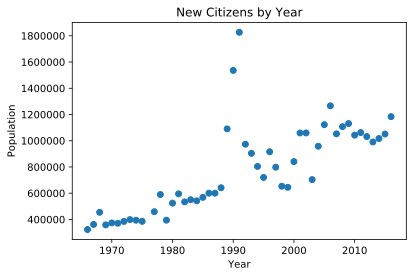

In [13]:
# why they spiked in 1990 - 1993, gulf war

x = df[:50].new_citizens
y = df[:50].year
plt.title('New Citizens by Year')
plt.xlabel("Year")
plt.ylabel("Population")
matplotlib.pyplot.scatter(y,x)
matplotlib.pyplot.show()

In [14]:
# create another data frame that has year, US GDP, global population, and an indicator for foreign policy
# 1 = favors immigrants, 0 = doesn't favor immigrants

gdp_pop = pd.read_csv('GDP_population.csv')
gdp_pop.head()

,Year,US GDP,US Population,Global Population,Foreign Policy
0,1929,1.057,121769000,NaN,0
1,1930,0.967,123075000,NaN,0
2,1931,0.905,124038000,NaN,0
3,1932,0.788,124839000,NaN,0
4,1933,0.778,125580000,NaN,0


In [15]:
# merge immigrants, gdp, and population with year to the new_citizens dataframe

combine_table = gdp_pop.merge(df,left_on='Year',right_on='year',how='left').dropna()
combine_table = combine_table.rename(columns={'Global Population': 'Global_Population', 'US Population': 'US_Population', 'Foreign Policy': 'Foreign_Policy','US GDP': 'US_GDP'})
combine_table.sort_values(by='year',ascending=False)
del combine_table['year']
combine_table.head()

,Year,US_GDP,US_Population,Global_Population,Foreign_Policy,new_citizens
22,1951,2.360,153982000,2.583817e+09,0,205717.0
23,1952,2.456,156391000,2.630584e+09,0,265520.0
24,1953,2.571,158957000,2.677230e+09,0,170434.0
25,1954,2.557,161882000,2.724302e+09,0,208177.0
26,1955,2.739,165068000,2.772243e+09,0,237790.0


In [16]:
# write the table to a picklefile, then read the pickle
# look up pandas pickle process

combine_table.to_pickle('new_citizens.pkl')
combine_table = pd.read_pickle('new_citizens.pkl')

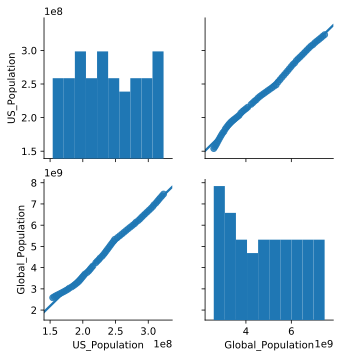

In [17]:
# idk what this shows

sns.pairplot(combine_table, vars=['US_Population', 'Global_Population'], kind='reg');

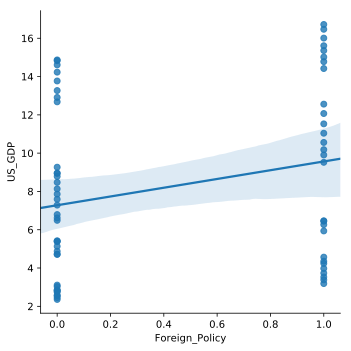

In [18]:
# idk what this shows

sns.lmplot(y='US_GDP', x='Foreign_Policy', data = combine_table);

In [19]:
# preform an ANOVA test on current data

new = ols('new_citizens ~ US_GDP + US_Population + Global_Population + Foreign_Policy', data=combine_table).fit()
table = sm.stats.anova_lm(new, typ=2) # Type 2 ANOVA DataFrame

print(table)

                         sum_sq    df          F    PR(>F)
US_GDP             5.861448e+10   1.0   1.710057  0.195967
US_Population      1.386067e+11   1.0   4.043803  0.048834
Global_Population  3.506919e+11   1.0  10.231313  0.002206
Foreign_Policy     9.428698e+10   1.0   2.750790  0.102426
Residual           2.056580e+12  60.0        NaN       NaN


In [20]:
combine_table.corr()

,Year,US_GDP,US_Population,Global_Population,Foreign_Policy,new_citizens
Year,1.000000,0.984557,0.998734,0.998242,0.260509,0.843042
US_GDP,0.984557,1.000000,0.989324,0.991308,0.251821,0.828478
US_Population,0.998734,0.989324,1.000000,0.997858,0.275386,0.833869
Global_Population,0.998242,0.991308,0.997858,1.000000,0.256566,0.846668
Foreign_Policy,0.260509,0.251821,0.275386,0.256566,1.000000,0.073386
new_citizens,0.843042,0.828478,0.833869,0.846668,0.073386,1.000000


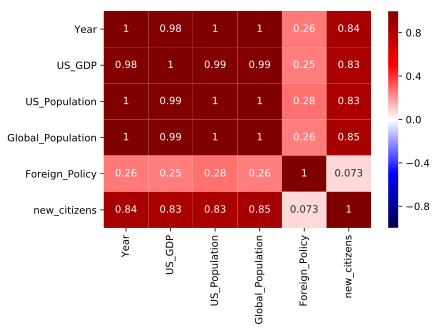

In [21]:
# need to adjust foreign policy indicator

sns.heatmap(combine_table.corr(), cmap='seismic',vmin=-1,vmax=1, annot=True);

In [22]:
# use conditional probability on foreign policy
# currently goes back until 1951
# Based it off of the president because when a president was elected. Congress's party fell in line with the party of
# the president except when Nixon, Ford, HW were president.

rating_fp = combine_table.groupby('Foreign_Policy').size().div(len(combine_table))
rating_fp

Foreign_Policy
0    0.569231
1    0.430769
dtype: float64

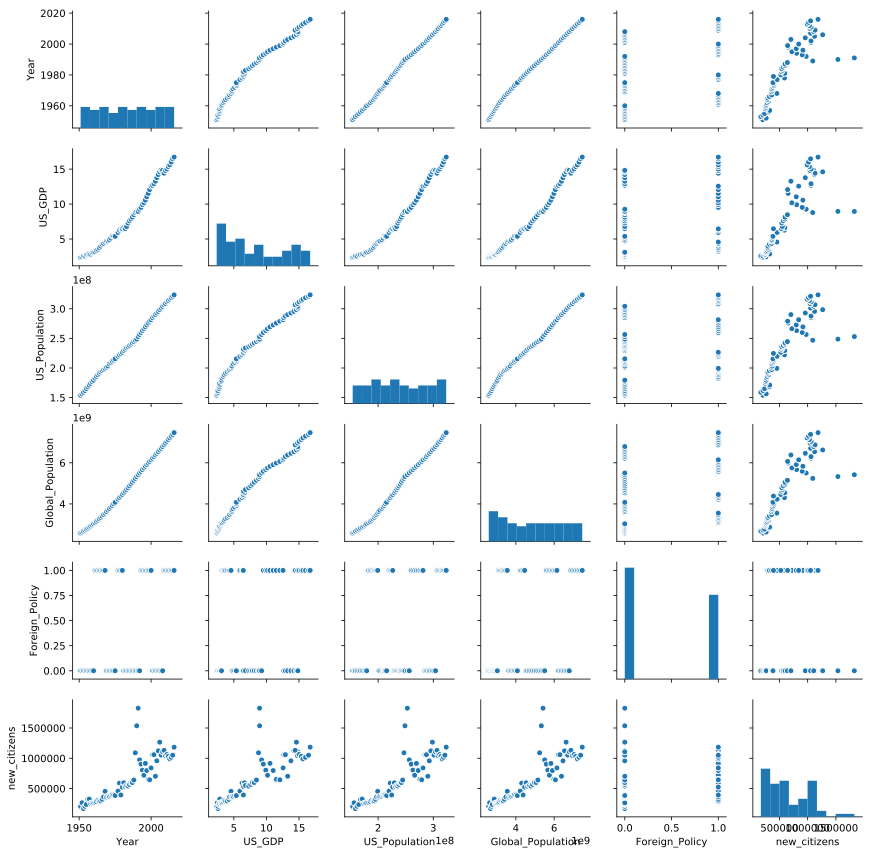

In [23]:
sns.pairplot(combine_table, size = 2, aspect=1);

In [24]:
y, X = patsy.dmatrices('new_citizens ~ US_GDP + US_Population + Global_Population + Foreign_Policy', data=combine_table, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           new_citizens   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     48.10
Date:                Fri, 20 Apr 2018   Prob (F-statistic):           4.56e-18
Time:                        15:17:07   Log-Likelihood:                -878.01
No. Observations:                  65   AIC:                             1766.
Df Residuals:                      60   BIC:                             1777.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.074e+05   6.37e+05      0.796      0.429   -7.67e+05    1.78e+06
US_GDP            -5.079e+04   3.88e+04     -1.308      0.196   -1.28e+05    2.69e+04
US_Population        -0.0150      0.007     -2.011      0.049      -0.030   -7.91e-05
Global_Population     0.0009      0.000      3.199      0.002       0.000       0.001
Foreign_Policy    -8.363e+04   5.04e+04     -1.659      0.102   -1.84e+05    1.72e+04
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.843
Skew:                           2.448   Prob(JB):                     1.17e-68
Kurtosis:                      12.568   Cond. No.                     1.41e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
lr = LinearRegression()


X = combine_table.iloc[:,1:4]
# Choose the response variable(s)
y = combine_table.iloc[:,0]
# Fit the model to the full dataset
lr.fit(X,y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9996026646185724

# Score is above

In [34]:
X

,US_GDP,US_Population,Global_Population
22,2.360,153982000,2.583817e+09
23,2.456,156391000,2.630584e+09
24,2.571,158957000,2.677230e+09
25,2.557,161882000,2.724302e+09
26,2.739,165068000,2.772243e+09
27,2.797,168089000,2.821383e+09
28,2.856,171189000,2.871952e+09
29,2.835,174153000,2.924081e+09
30,3.031,177136000,2.977825e+09
31,3.109,179322000,3.033213e+09


In [26]:
# what to do for foreign policy

# have training sets and test sets
# have multiple training and test sets
# we want cross validation (test error) is the lowest